
# 📊 Exploratory Data Analysis - Raw Dataset

Questo notebook esegue un'analisi esplorativa completa del dataset raw per il progetto StiMatrix.

## 🎯 Obiettivi dell'analisi:
1. Caricamento configurazione e dati
2. Overview del dataset (shape, dtypes, memoria, head)
3. Analisi missingness e cardinalità categoriche
4. Distribuzione del target `AI_Prezzo_Ridistribuito`
5. Summary per gruppi (`AI_ZonaOmi`, `AI_IdCategoriaCatastale`)
6. Correlazioni con il target
7. Check geospaziale rapido


## 1. Setup e caricamento dati

In [1]:

# Import delle librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import os
import re
from pathlib import Path
from scipy import stats as scipy_stats
import warnings
warnings.filterwarnings('ignore')

# Configurazione matplotlib per grafici più leggibili
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Setup completato! Tutte le librerie caricate correttamente.")


✅ Setup completato! Tutte le librerie caricate correttamente.


In [2]:

# Setup output directory
output_dir = Path('eda_outputs')
output_dir.mkdir(parents=True, exist_ok=True)
print(f"📁 Directory output: {output_dir}")

# Carica configurazione
config_path = '../config/config.yaml'
try:
    with open(config_path, 'r', encoding='utf-8') as f:
        config = yaml.safe_load(f)
    print(f"✅ Config caricata da: {config_path}")
except Exception as e:
    print(f"❌ Errore nel caricamento config: {e}")
    raise

# Carica dataset
data_path = '../data/raw/raw.parquet'
try:
    df_raw = pd.read_parquet(data_path)
    print(f"✅ Dataset caricato da: {data_path}")
    print(f"📊 Dimensioni: {df_raw.shape[0]:,} righe × {df_raw.shape[1]} colonne")
    print(f"💾 Memoria utilizzata: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    target_col = config['target']['column_candidates'][0]
    print(f"🎯 Target identificato: {target_col}")
except Exception as e:
    print(f"❌ Errore nel caricamento dati: {e}")
    raise


📁 Directory output: eda_outputs
✅ Config caricata da: ../config/config.yaml
✅ Dataset caricato da: ../data/raw/raw.parquet
📊 Dimensioni: 4,226 righe × 256 colonne
💾 Memoria utilizzata: 31.37 MB
🎯 Target identificato: AI_Prezzo_Ridistribuito


## 2. Overview del dataset

In [3]:

print("=" * 60)
print("📋 OVERVIEW DATASET")
print("=" * 60)

print(f"\n📊 Dimensioni: {df_raw.shape[0]:,} righe × {df_raw.shape[1]} colonne")
memory_mb = df_raw.memory_usage(deep=True).sum() / 1024**2
print(f"💾 Memoria utilizzata: {memory_mb:.2f} MB")

print(f"\n📋 Tipi di dati:")
dtype_counts = df_raw.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} colonne")


📋 OVERVIEW DATASET

📊 Dimensioni: 4,226 righe × 256 colonne
💾 Memoria utilizzata: 31.37 MB

📋 Tipi di dati:
  float64: 148 colonne
  object: 61 colonne
  int64: 43 colonne
  bool: 4 colonne


In [4]:

# Prime righe del dataset
print("\n🔍 Prime 5 righe del dataset:")
display(df_raw.head())

# Informazioni dettagliate sulle colonne
print("\n📝 Informazioni dettagliate sulle colonne:")
df_info = df_raw.dtypes.to_frame('Tipo')
df_info['Valori Non-Nulli'] = df_raw.count()
df_info['Valori Nulli'] = df_raw.isnull().sum()
df_info['% Completamento'] = (1 - df_raw.isnull().mean()) * 100
display(df_info.round(2))



🔍 Prime 5 righe del dataset:


,A_AnnoStipula,A_MeseStipula,A_Anno,A_Semestre,A_RegPart,A_IdConservatoria,A_IdTipologiaAtto,A_IdDecodificaAtto,A_TotaleImmobili,A_Numero,...,POI_gym_count,POI_park_count,POI_restaurant_count,POI_school_count,POI_gas_station_count,POI_transit_station_count,POI_supermarket_count,POI_university_count,InZTL,AI_Prezzo_Ridistribuito
0,2023,9,2023,20231,NaN,MN00,Pertinenze,Pertinenze,1,2438036,...,3,0,3,0,1,15,1,2,0,25000.000000
1,2021,9,2021,20211,8205.0,MN00,Residenziale,Residenziale singolo,2,1238404,...,0,1,1,2,0,10,0,0,0,26128.878282
2,2021,9,2021,20211,8205.0,MN00,Residenziale,Residenziale singolo,2,1238404,...,0,1,1,2,0,10,0,0,0,65871.121718
3,2023,7,2023,20222,NaN,MN00,Residenziale,Residenziale singolo,2,2361168,...,1,0,15,8,0,12,0,2,0,13423.836389
4,2023,7,2023,20222,NaN,MN00,Residenziale,Residenziale singolo,2,2361168,...,1,0,15,8,0,12,0,2,0,256576.163611



📝 Informazioni dettagliate sulle colonne:


,Tipo,Valori Non-Nulli,Valori Nulli,% Completamento
A_AnnoStipula,int64,4226,0,100.00
A_MeseStipula,int64,4226,0,100.00
A_Anno,int64,4226,0,100.00
A_Semestre,object,4226,0,100.00
A_RegPart,float64,2407,1819,56.96
...,...,...,...,...
POI_transit_station_count,int64,4226,0,100.00
POI_supermarket_count,int64,4226,0,100.00
POI_university_count,int64,4226,0,100.00
InZTL,int64,4226,0,100.00


## 3. Analisi Missingness

In [5]:

print("=" * 60)
print("🔍 ANALISI MISSINGNESS")
print("=" * 60)

missing_stats = pd.DataFrame({
    'Totale_Null': df_raw.isnull().sum(),
    'Percentuale_Null': (df_raw.isnull().mean() * 100).round(2),
    'Tipo': df_raw.dtypes
})

high_missing = missing_stats[missing_stats['Percentuale_Null'] > 50].sort_values('Percentuale_Null', ascending=False)

print(f"\n⚠️  Colonne con >50% valori mancanti ({len(high_missing)} colonne):")
if len(high_missing) > 0:
    display(high_missing.head(10))
else:
    print("  Nessuna colonna con >50% valori mancanti")

# Salva risultati
missing_stats.to_csv(output_dir / 'missingness_analysis.csv')
print(f"\n💾 Risultati salvati in {output_dir}/missingness_analysis.csv")


🔍 ANALISI MISSINGNESS

⚠️  Colonne con >50% valori mancanti (22 colonne):


,Totale_Null,Percentuale_Null,Tipo
AI_SezioneAmministrativa,4226,100.00,object
AI_VisuraParseMutazioniSoggettiveErrore,4223,99.93,object
AI_VisuraErrore,4221,99.88,object
OV_Id_scadente,3921,92.78,object
OV_IdTipologiaEdilizia_scadente,3921,92.78,object
OV_IdZona_scadente,3921,92.78,object
OV_ValoreMercatoSup_scadente,3921,92.78,object
OV_ValoreLocazioneMin_scadente,3921,92.78,float64
OV_ValoreMercatoMin_scadente,3921,92.78,float64
OV_Stato_scadente,3921,92.78,object



💾 Risultati salvati in eda_outputs/missingness_analysis.csv


## 4. Analisi del Target

In [6]:

if target_col not in df_raw.columns:
    print(f"❌ Target '{target_col}' non trovato nelle colonne!")
    raise ValueError(f"Target column '{target_col}' not found")

print("=" * 60)
print(f"🎯 ANALISI DISTRIBUZIONE TARGET: {target_col}")
print("=" * 60)

print(f"\n📊 Info target:")
print(f"  Tipo: {df_raw[target_col].dtype}")
print(f"  Valori non-nulli: {df_raw[target_col].count():,}")
print(f"  Valori mancanti: {df_raw[target_col].isnull().sum():,} ({df_raw[target_col].isnull().mean()*100:.2f}%)")

target_data = df_raw[target_col].dropna()
stats = target_data.describe()

print(f"\n📈 Statistiche descrittive:")
print(f"  Conteggio: {stats['count']:,.0f}")
print(f"  Media: €{stats['mean']:,.2f}")
print(f"  Mediana: €{stats['50%']:,.2f}")
print(f"  Std Dev: €{stats['std']:,.2f}")
print(f"  Min: €{stats['min']:,.2f}")
print(f"  Max: €{stats['max']:,.2f}")

# Calcola fasce di prezzo a quantili
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
price_bands = target_data.quantile(quantiles)

print(f"\n🏷️  Fasce di prezzo (quantili):")
for i in range(len(quantiles)-1):
    q_low = quantiles[i]
    q_high = quantiles[i+1]
    price_low = price_bands.iloc[i]
    price_high = price_bands.iloc[i+1]
    print(f"  Q{int(q_low*100):02d}-Q{int(q_high*100):02d}: €{price_low:,.0f} - €{price_high:,.0f}")

# Salva statistiche target
stats_df = pd.DataFrame(stats).reset_index()
stats_df.columns = ['Statistic', 'Value']
stats_df.to_csv(output_dir / 'target_statistics.csv', index=False)
print(f"\n💾 Statistiche target salvate in {output_dir}/target_statistics.csv")


🎯 ANALISI DISTRIBUZIONE TARGET: AI_Prezzo_Ridistribuito

📊 Info target:
  Tipo: float64
  Valori non-nulli: 4,226
  Valori mancanti: 0 (0.00%)

📈 Statistiche descrittive:
  Conteggio: 4,226
  Media: €67,109.59
  Mediana: €48,335.85
  Std Dev: €80,551.56
  Min: €244.65
  Max: €1,483,525.92

🏷️  Fasce di prezzo (quantili):
  Q00-Q20: €245 - €15,572
  Q20-Q40: €15,572 - €35,455
  Q40-Q60: €35,455 - €61,169
  Q60-Q80: €61,169 - €99,312
  Q80-Q100: €99,312 - €1,483,526

💾 Statistiche target salvate in eda_outputs/target_statistics.csv


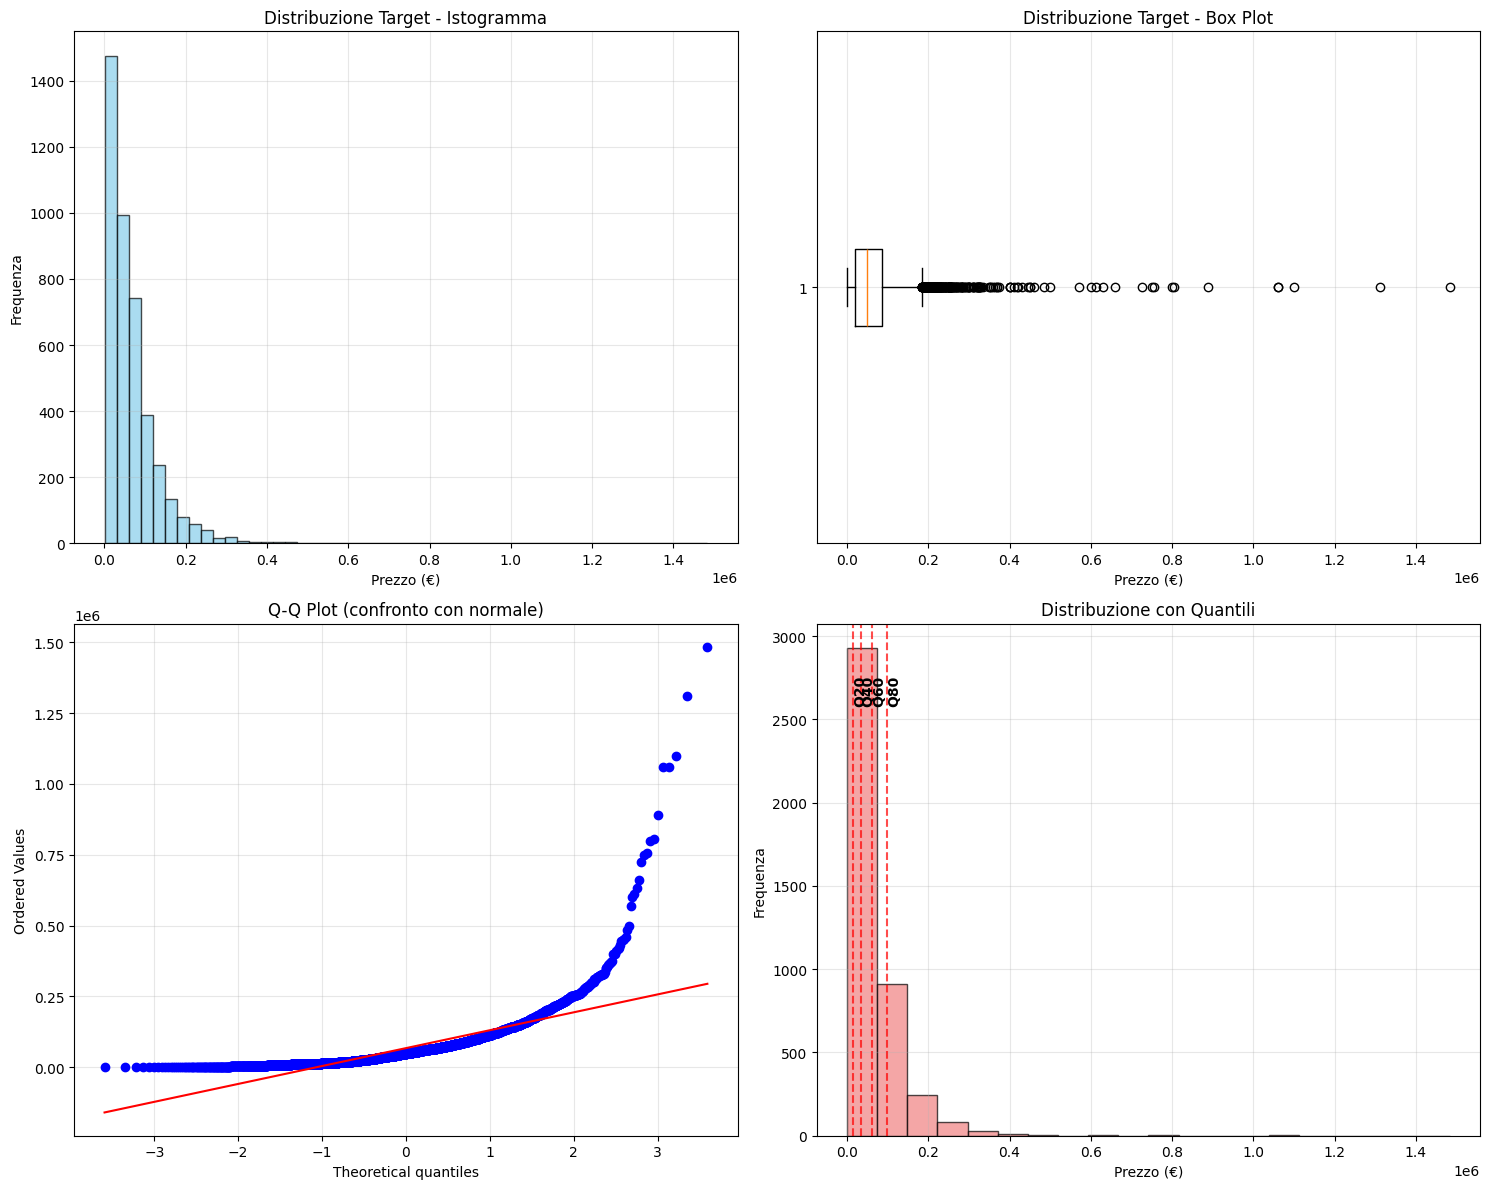

In [7]:

# Grafici della distribuzione del target
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Istogramma
axes[0,0].hist(target_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribuzione Target - Istogramma')
axes[0,0].set_xlabel('Prezzo (€)')
axes[0,0].set_ylabel('Frequenza')
axes[0,0].grid(True, alpha=0.3)

# 2. Box plot
axes[0,1].boxplot(target_data, vert=False)
axes[0,1].set_title('Distribuzione Target - Box Plot')
axes[0,1].set_xlabel('Prezzo (€)')
axes[0,1].grid(True, alpha=0.3)

# 3. QQ Plot
sample_size = min(5000, len(target_data))
sample_data = target_data.sample(n=sample_size, random_state=42)
scipy_stats.probplot(sample_data, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot (confronto con normale)')
axes[1,0].grid(True, alpha=0.3)

# 4. Quantili
quantiles_viz = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
axes[1,1].hist(target_data, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
for q in quantiles_viz[1:-1]:
    price_q = target_data.quantile(q)
    axes[1,1].axvline(price_q, color='red', linestyle='--', alpha=0.7)
    axes[1,1].text(price_q, axes[1,1].get_ylim()[1]*0.9, f'Q{int(q*100)}',
                   rotation=90, verticalalignment='top', fontweight='bold')
axes[1,1].set_title('Distribuzione con Quantili')
axes[1,1].set_xlabel('Prezzo (€)')
axes[1,1].set_ylabel('Frequenza')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


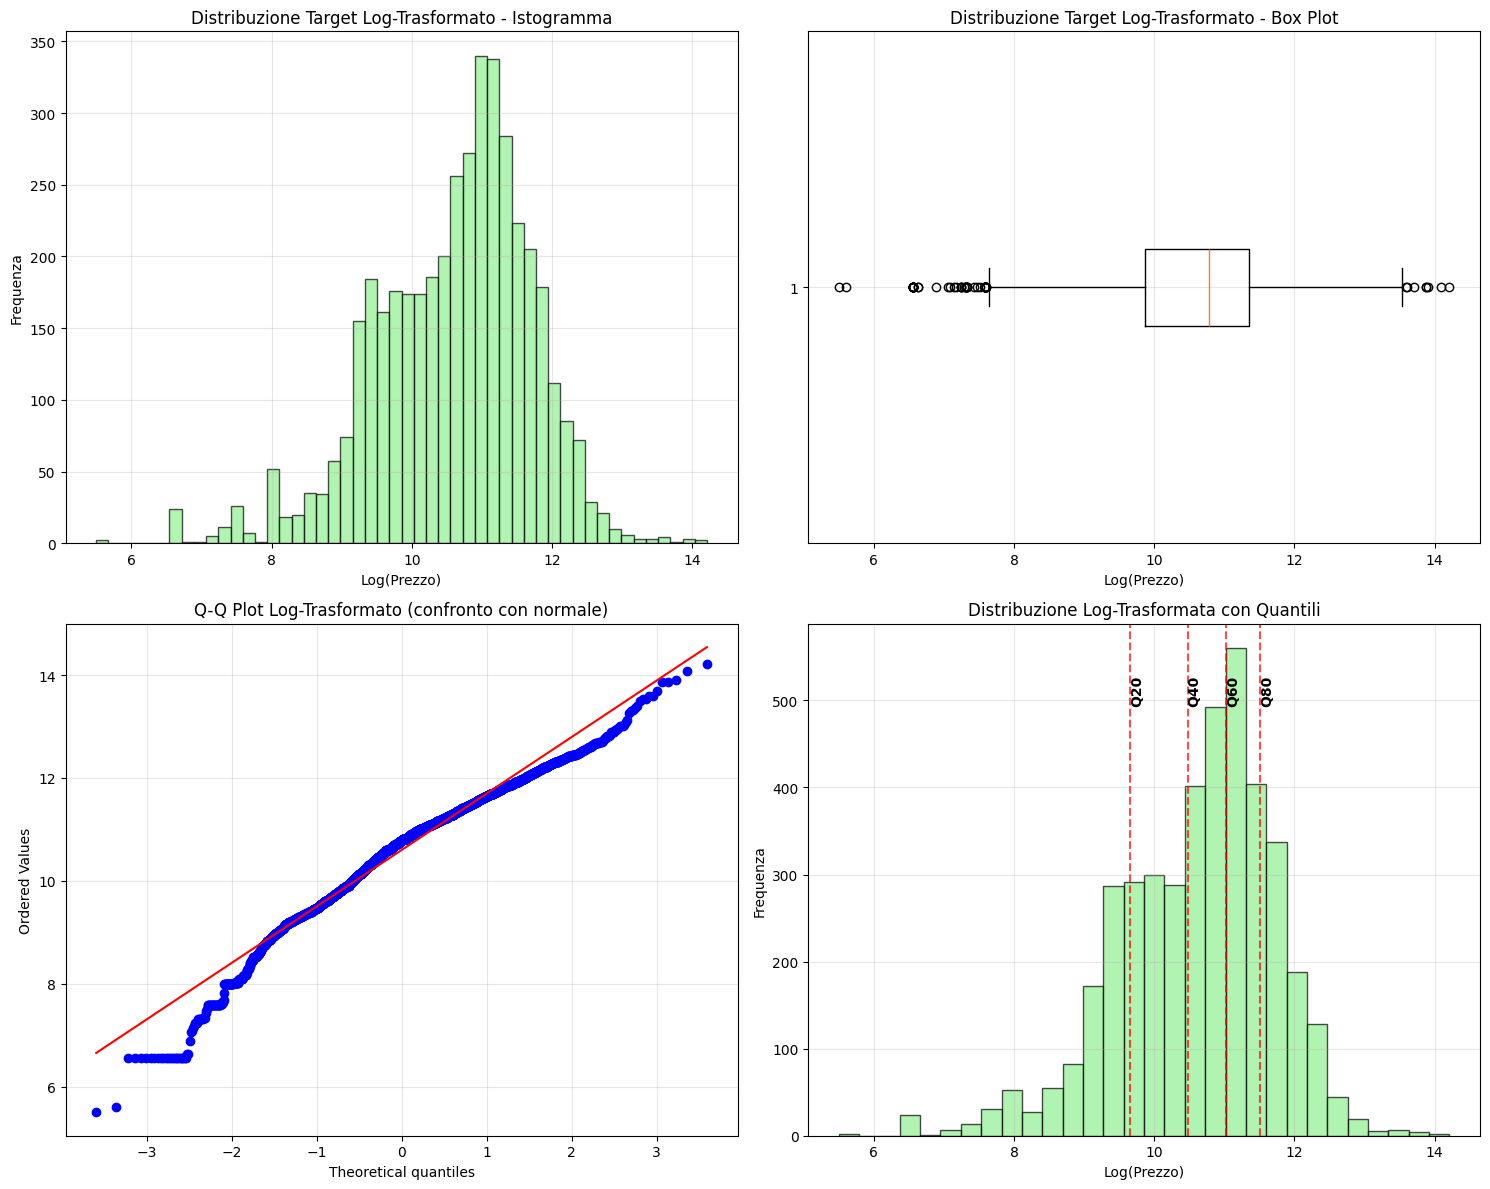


📊 Statistiche target log-trasformato:
  Media log: 10.5999
  Mediana log: 10.7859
  Std Dev log: 1.1116
  Skewness log: -0.6535
  Kurtosis log: 0.8446

📊 Confronto normalità (Shapiro-Wilk test su campione):
  P-value originale: 0.000000
  P-value log-trasformato: 0.000000


In [8]:
# Grafici della distribuzione del target con trasformazione logaritmica
target_log = np.log(target_data)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Istogramma log-trasformato
axes[0,0].hist(target_log, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,0].set_title('Distribuzione Target Log-Trasformato - Istogramma')
axes[0,0].set_xlabel('Log(Prezzo)')
axes[0,0].set_ylabel('Frequenza')
axes[0,0].grid(True, alpha=0.3)

# 2. Box plot log-trasformato
axes[0,1].boxplot(target_log, vert=False)
axes[0,1].set_title('Distribuzione Target Log-Trasformato - Box Plot')
axes[0,1].set_xlabel('Log(Prezzo)')
axes[0,1].grid(True, alpha=0.3)

# 3. QQ Plot log-trasformato
sample_log = target_log.sample(n=sample_size, random_state=42)
scipy_stats.probplot(sample_log, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot Log-Trasformato (confronto con normale)')
axes[1,0].grid(True, alpha=0.3)

# 4. Distribuzione log-trasformata con quantili
quantiles_viz = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
axes[1,1].hist(target_log, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
for q in quantiles_viz[1:-1]:
    price_q_log = target_log.quantile(q)
    axes[1,1].axvline(price_q_log, color='red', linestyle='--', alpha=0.7)
    axes[1,1].text(price_q_log, axes[1,1].get_ylim()[1]*0.9, f'Q{int(q*100)}',
                   rotation=90, verticalalignment='top', fontweight='bold')
axes[1,1].set_title('Distribuzione Log-Trasformata con Quantili')
axes[1,1].set_xlabel('Log(Prezzo)')
axes[1,1].set_ylabel('Frequenza')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiche del target log-trasformato
print("\n📊 Statistiche target log-trasformato:")
print(f"  Media log: {target_log.mean():.4f}")
print(f"  Mediana log: {target_log.median():.4f}")
print(f"  Std Dev log: {target_log.std():.4f}")
print(f"  Skewness log: {scipy_stats.skew(target_log):.4f}")
print(f"  Kurtosis log: {scipy_stats.kurtosis(target_log):.4f}")

print(f"\n📊 Confronto normalità (Shapiro-Wilk test su campione):")
_, p_orig = scipy_stats.shapiro(sample_data)
_, p_log = scipy_stats.shapiro(sample_log)
print(f"  P-value originale: {p_orig:.6f}")
print(f"  P-value log-trasformato: {p_log:.6f}")

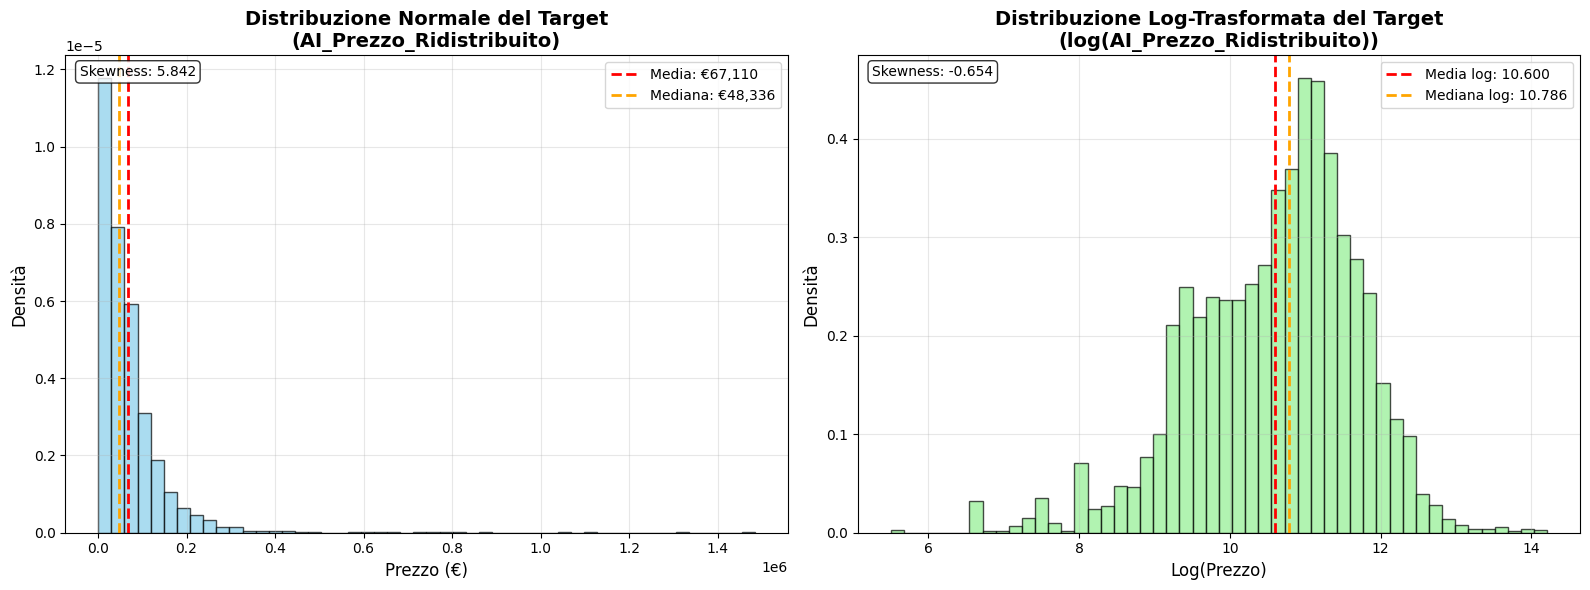

📊 CONFRONTO DISTRIBUZIONI: NORMALE vs LOG-TRASFORMATA

🔍 Distribuzione originale:
  Skewness: 5.8418
  Kurtosis: 65.5529
  Media: €67,109.59
  Mediana: €48,335.85
  Rapporto Media/Mediana: 1.388

📈 Distribuzione log-trasformata:
  Skewness: -0.6535
  Kurtosis: 0.8446
  Media: 10.5999
  Mediana: 10.7859
  Rapporto Media/Mediana: 0.983

✅ Miglioramento con trasformazione logaritmica:
  Riduzione Skewness: 5.1883
  La distribuzione log è più simmetrica


In [9]:
# Grafico comparativo: distribuzione normale vs log-trasformata
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Distribuzione normale
axes[0].hist(target_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)
axes[0].set_title('Distribuzione Normale del Target\n(AI_Prezzo_Ridistribuito)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Prezzo (€)', fontsize=12)
axes[0].set_ylabel('Densità', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

# Aggiungi statistiche sulla distribuzione normale
mean_val = target_data.mean()
median_val = target_data.median()
axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: €{mean_val:,.0f}')
axes[0].axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Mediana: €{median_val:,.0f}')
axes[0].legend()

# 2. Distribuzione log-trasformata
axes[1].hist(target_log, bins=50, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
axes[1].set_title('Distribuzione Log-Trasformata del Target\n(log(AI_Prezzo_Ridistribuito))', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Log(Prezzo)', fontsize=12)
axes[1].set_ylabel('Densità', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Aggiungi statistiche sulla distribuzione log
mean_log = target_log.mean()
median_log = target_log.median()
axes[1].axvline(mean_log, color='red', linestyle='--', linewidth=2, label=f'Media log: {mean_log:.3f}')
axes[1].axvline(median_log, color='orange', linestyle='--', linewidth=2, label=f'Mediana log: {median_log:.3f}')
axes[1].legend()

# Aggiungi annotazioni con metriche di normalità
skew_orig = scipy_stats.skew(target_data)
skew_log = scipy_stats.skew(target_log)

axes[0].text(0.02, 0.98, f'Skewness: {skew_orig:.3f}', transform=axes[0].transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[1].text(0.02, 0.98, f'Skewness: {skew_log:.3f}', transform=axes[1].transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Stampa confronto delle statistiche
print("=" * 60)
print("📊 CONFRONTO DISTRIBUZIONI: NORMALE vs LOG-TRASFORMATA")
print("=" * 60)

print(f"\n🔍 Distribuzione originale:")
print(f"  Skewness: {skew_orig:.4f}")
print(f"  Kurtosis: {scipy_stats.kurtosis(target_data):.4f}")
print(f"  Media: €{target_data.mean():,.2f}")
print(f"  Mediana: €{target_data.median():,.2f}")
print(f"  Rapporto Media/Mediana: {target_data.mean()/target_data.median():.3f}")

print(f"\n📈 Distribuzione log-trasformata:")
print(f"  Skewness: {skew_log:.4f}")
print(f"  Kurtosis: {scipy_stats.kurtosis(target_log):.4f}")
print(f"  Media: {target_log.mean():.4f}")
print(f"  Mediana: {target_log.median():.4f}")
print(f"  Rapporto Media/Mediana: {target_log.mean()/target_log.median():.3f}")

print(f"\n✅ Miglioramento con trasformazione logaritmica:")
print(f"  Riduzione Skewness: {abs(skew_orig) - abs(skew_log):.4f}")
print(f"  La distribuzione log è {'più simmetrica' if abs(skew_log) < abs(skew_orig) else 'meno simmetrica'}")

## 5. Correlazioni con il Target

In [10]:

print("=" * 60)
print(f"📊 ANALISI CORRELAZIONI CON {target_col}")
print("=" * 60)

# Identifica colonne numeriche escludendo il target
numeric_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"\n🔢 Colonne numeriche identificate: {len(numeric_cols)}")

# Identifica colonne costanti
constant_cols = [col for col in numeric_cols if df_raw[col].nunique() <= 1]
print(f"⚠️  Colonne costanti identificate: {len(constant_cols)}")
if constant_cols:
    print("  Colonne:", constant_cols[:10])

# Rimuovi colonne costanti
analysis_cols = [c for c in numeric_cols if c not in constant_cols]

corr_data = df_raw[analysis_cols + [target_col]].dropna()
if len(corr_data) == 0:
    print("❌ Nessun dato valido per correlazioni")
else:
    correlations = corr_data.corr(numeric_only=True)[target_col].drop(target_col)

    corr_df = pd.DataFrame({
        'Colonna': correlations.index,
        'Correlazione': correlations.values,
        'Correlazione_Assoluta': np.abs(correlations.values)
    }).round(4).sort_values('Correlazione_Assoluta', ascending=False)

    threshold = 0.1
    significant_corr = corr_df[corr_df['Correlazione_Assoluta'] >= threshold]
    print(f"\n📈 Correlazioni significative (|r| >= {threshold}): {len(significant_corr)}")
    if len(significant_corr) > 0:
        print("\n🔝 Top 15 correlazioni:")
        display(significant_corr.head(15))

    print(f"\n📊 Statistiche correlazioni:")
    print(f"  Max correlazione positiva: {corr_df['Correlazione'].max():.4f}")
    print(f"  Max correlazione negativa: {corr_df['Correlazione'].min():.4f}")
    print(f"  Media correlazione assoluta: {corr_df['Correlazione_Assoluta'].mean():.4f}")

    # Salva risultati
    corr_df.to_csv(output_dir / 'correlations_with_target.csv', index=False)
    print(f"\n💾 Correlazioni salvate in {output_dir}/correlations_with_target.csv")


📊 ANALISI CORRELAZIONI CON AI_Prezzo_Ridistribuito

🔢 Colonne numeriche identificate: 190
⚠️  Colonne costanti identificate: 8
  Colonne: ['ISC_CodReg', 'ISC_CodUts', 'ISC_ProCom', 'ISC_CodZic', 'OV_ValoreMercatoMin_scadente', 'OV_ValoreMercatoMax_scadente', 'OV_ValoreLocazioneMin_scadente', 'PC_PoligonoMetricoSrid']

📈 Correlazioni significative (|r| >= 0.1): 68

🔝 Top 15 correlazioni:


,Colonna,Correlazione,Correlazione_Assoluta
18,AI_SuperficieVisuraTotale,0.6906,0.6906
22,AI_Superficie,0.6906,0.6906
20,AI_SuperficieVisuraTotaleAttuale,0.6856,0.6856
19,AI_SuperficieVisuraTotaleE,0.6824,0.6824
14,AI_Rendita,0.6791,0.6791
21,AI_SuperficieVisuraTotaleEAttuale,0.6763,0.6763
16,AI_SuperficieCalcolata,0.6288,0.6288
152,OV_ValoreMercatoMin_normale,0.2642,0.2642
119,II_ST22,-0.2614,0.2614
154,OV_ValoreMercatoMax_normale,0.2594,0.2594



📊 Statistiche correlazioni:
  Max correlazione positiva: 0.6906
  Max correlazione negativa: -0.2614
  Media correlazione assoluta: 0.1172

💾 Correlazioni salvate in eda_outputs/correlations_with_target.csv


## 6. Summary per Gruppi

In [11]:

print("=" * 60)
print("👥 ANALISI SUMMARY PER GRUPPI")
print("=" * 60)

group_cols = ['AI_ZonaOmi', 'AI_IdCategoriaCatastale']

# Verifica che le colonne esistano
missing_group_cols = [col for col in group_cols if col not in df_raw.columns]
if missing_group_cols:
    print(f"❌ Colonne di grouping mancanti: {missing_group_cols}")
    print(f"🔍 Colonne disponibili con 'AI_': {[c for c in df_raw.columns if 'AI_' in c][:10]}")
else:
    print(f"✅ Colonne di grouping trovate: {group_cols}")

group_summaries = {}

for group_col in group_cols:
    if group_col in df_raw.columns:
        print(f"\n📊 Summary per gruppo: {group_col}")
        print("-" * 50)

        valid_data = df_raw[[group_col, target_col]].dropna()
        if len(valid_data) == 0:
            print(f"❌ Nessun dato valido per {group_col}")
            continue

        group_stats = valid_data.groupby(group_col)[target_col].agg([
            'count', 'mean', 'median', 'std', 'min', 'max'
        ]).round(2)

        group_stats = group_stats.sort_values('count', ascending=False)
        group_stats['cv'] = (group_stats['std'] / group_stats['mean'] * 100).round(2)

        print(f"Gruppi trovati: {len(group_stats)}")
        print(f"\n🔝 Top 15 gruppi per dimensione:")
        display(group_stats.head(15))

        group_summaries[group_col] = group_stats
        
        # Salva su CSV
        output_file = output_dir / f'group_summary_{group_col}.csv'
        group_stats.to_csv(output_file)
        print(f"💾 Salvato: {output_file}")
    else:
        print(f"⚠️  Colonna {group_col} non trovata, skip")


👥 ANALISI SUMMARY PER GRUPPI
✅ Colonne di grouping trovate: ['AI_ZonaOmi', 'AI_IdCategoriaCatastale']

📊 Summary per gruppo: AI_ZonaOmi
--------------------------------------------------
Gruppi trovati: 13

🔝 Top 15 gruppi per dimensione:


,count,mean,median,std,min,max,cv
AI_ZonaOmi,,,,,,,
B1,1252,93594.07,65000.00,109655.36,1200.00,1483525.92,117.16
C4,809,54657.31,52200.00,46136.08,705.23,322540.22,84.41
D2,598,82479.64,56747.67,98325.81,270.18,1311003.46,119.21
D1,483,38208.02,26415.18,34954.00,1687.00,254750.98,91.48
D3,296,40986.36,28192.71,41763.69,1500.00,326163.87,101.90
C2,237,47663.99,42128.96,36558.50,244.65,181589.96,76.70
C5,206,50329.50,50000.00,36062.81,4000.00,327262.96,71.65
C3,132,45741.89,37282.00,38082.17,1169.94,202312.69,83.25
E3,59,86365.49,36537.00,79293.93,6462.79,274431.22,91.81


💾 Salvato: eda_outputs\group_summary_AI_ZonaOmi.csv

📊 Summary per gruppo: AI_IdCategoriaCatastale
--------------------------------------------------
Gruppi trovati: 9

🔝 Top 15 gruppi per dimensione:


,count,mean,median,std,min,max,cv
AI_IdCategoriaCatastale,,,,,,,
00275,1546,19528.16,15269.65,16062.61,270.18,168996.54,82.25
00020,1469,108437.67,86619.05,85276.42,5330.00,1483525.92,78.64
00030,911,67518.96,57936.68,58201.29,2966.03,1311003.46,86.20
00200,124,94698.85,53500.00,145470.16,2000.00,1060000.00,153.61
00100,80,147680.02,80500.00,189493.28,1200.00,1100000.00,128.31
00040,53,44382.08,39600.00,28344.93,8470.59,160000.00,63.87
00070,38,150574.66,144246.71,68818.26,43889.32,326163.87,45.70
00050,4,22358.22,21094.11,24591.93,244.65,47000.00,109.99
00010,1,889313.48,889313.48,NaN,889313.48,889313.48,NaN


💾 Salvato: eda_outputs\group_summary_AI_IdCategoriaCatastale.csv


## 7. Check Geospaziale

In [12]:

print("=" * 60)
print("🗺️  CHECK GEOSPAZIALE RAPIDO")
print("=" * 60)

candidates = []
all_cols = df_raw.columns.tolist()

# Pattern di interesse
geo_patterns = [
    'wkt', 'geometry', 'geom', 'geojson', 'the_geom', 'shape', 'polygon', 'point', 'linestring',
    'lat', 'latitude', 'lon', 'lng', 'longitude', 'coord', 'x_', 'y_', 'easting', 'northing',
    'geo', 'spatial', 'location', 'posizione', 'indirizzo', 'address'
]

for col in all_cols:
    col_l = col.lower()
    for pat in geo_patterns:
        if pat in col_l:
            sample_vals = df_raw[col].dropna().head(3).tolist()
            candidates.append({
                'Colonna': col,
                'Tipo': str(df_raw[col].dtype),
                'Pattern': pat,
                'NonNull_Count': int(df_raw[col].count()),
                'Esempi': str(sample_vals)[:100]  # Limita lunghezza esempi
            })
            break

if not candidates:
    print("\n❌ Nessuna colonna geospaziale candidata individuata")
else:
    geo_df = pd.DataFrame(candidates).drop_duplicates(subset=['Colonna', 'Pattern'])
    print(f"\n🗺️  Colonne candidate geospaziali: {len(geo_df)}")
    display(geo_df)
    
    # Salva risultati
    geo_df.to_csv(output_dir / 'geospatial_columns_check.csv', index=False)
    print(f"\n💾 Check geospaziale salvato in {output_dir}/geospatial_columns_check.csv")


🗺️  CHECK GEOSPAZIALE RAPIDO

🗺️  Colonne candidate geospaziali: 15


,Colonna,Tipo,Pattern,NonNull_Count,Esempi
0,AI_Latitudine,float64,lat,4226,"[45.1503481, 45.150455474853516, 45.1504554748..."
1,AI_Longitudine,float64,lon,4226,"[10.7645318, 10.770710945129395, 10.7707109451..."
2,AI_Posizione,object,posizione,4226,"['POINT (10.7645318 45.1503481)', 'POINT (10.7..."
3,AI_SuperficieCalcolata,float64,lat,4223,"[18.0, 21.0, 60.0]"
4,ISC_Geometry,object,geometry,4226,['MULTIPOLYGON (((10.767331549979215 45.151153...
5,ISC_ShapeLeng,float64,shape,4226,"[3178.32180066, 651.399531498, 651.399531498]"
6,ISC_ShapeArea,float64,shape,4226,"[177693.4543, 16052.9653428, 16052.9653428]"
7,OV_ValoreMercatoMax_normale,float64,x_,4226,"[950.0, 1000.0, 900.0]"
8,OV_ValoreMercatoMax_ottimo,float64,x_,1425,"[1500.0, 3000.0, 3000.0]"
9,OV_ValoreMercatoMax_scadente,float64,x_,305,"[750.0, 750.0, 750.0]"



💾 Check geospaziale salvato in eda_outputs/geospatial_columns_check.csv


## 8. Riepilogo finale

In [13]:

print("=" * 60)
print("🎉 ANALISI ESPLORATIVA COMPLETATA")
print("=" * 60)

print(f"\n📊 Dataset analizzato:")
print(f"  • Dimensioni: {df_raw.shape[0]:,} righe × {df_raw.shape[1]} colonne")
print(f"  • Target: {target_col}")
print(f"  • Memoria: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n💾 File generati in {output_dir}/:")
output_files = list(output_dir.glob('*.csv'))
for f in output_files:
    print(f"  • {f.name}")

print(f"\n✅ Analisi completata con successo!")
print(f"Puoi ora procedere con il preprocessing e il training del modello.")


🎉 ANALISI ESPLORATIVA COMPLETATA

📊 Dataset analizzato:
  • Dimensioni: 4,226 righe × 256 colonne
  • Target: AI_Prezzo_Ridistribuito
  • Memoria: 31.37 MB

💾 File generati in eda_outputs/:
  • correlations_with_target.csv
  • geospatial_columns_check.csv
  • group_summary_AI_IdCategoriaCatastale.csv
  • group_summary_AI_ZonaOmi.csv
  • missingness_analysis.csv
  • target_statistics.csv

✅ Analisi completata con successo!
Puoi ora procedere con il preprocessing e il training del modello.
